##  MultiShape Images Generation : 
### Generate a dataset of images that conatain primitive shapes.
* Shapes : Rectangle, Triangle, Ellipse.
* Generate a Dataset that Consists of Primitive MultiShapes Multicolor Images.
* Each Image contains multiple shapes with different colors, orientations, positions ...

#### Experiment 1 : Shapes Functions designed all random.
#### Experiment 2 : Shapes function less random, by introducing a geometric separation between shapes through formulas .



In [10]:
# Necessary Imports
import os # Interact with OS
import torch # PyTorch package
import numpy as np # Array manipulation
import matplotlib.pyplot as plt
import torchvision # Load tools for computer vision tasks
import torchvision.transforms.functional as F # Vision Preprocessing Transform Opeartions
# Image : Provides function to Create and Manipulate Images
# ImageDraw : Provides function to draw images
from PIL import Image, ImageDraw
import torchvision.transforms as transforms # Vision Transform Operations
import torch.nn as nn # Pytorch NNs 
import torch.nn.functional as F # Pytorch NN operations, activations, loss ...
import torch.optim as optim #  Optimization algorithms
from torchvision.datasets import ImageFolder # 
from sklearn.metrics import classification_report

In [11]:
# Define size of dataset or number of images to be generated
dataset_size = 2500
image_size = (400)

In [12]:
# Define helper functions 
# Function to generate a random rbg color 
def random_color():
  """
  Generates a random values color tuple.
  input : none.
  output : tuple representing a color .
  
  """
  return tuple(torch.randint(0,256,size=(3,),dtype=torch.uint8).tolist())

# Function to generate a random starting point for a shape 

def random_point(bounds):

  """
  Generates random coordinates (x,y) within the bounds for a point.
  input : bounds ( upper height and width ).
  output : tuple of two coordinates.
  """

  return tuple(torch.randint(bound, image_size[0] - bound, size=(1,)).item() for bound in bounds)


# Function to generate a rectangle 

def rectangle(image_size):
  """
  Generates a random size and color rectangle shape.
  input : desired image size.
  output : shape coordinates.
  """
  # Create a tensor of height and width (bounds[0] & bounds[1])
  bounds = torch.randint(image_size[0] // 4, image_size[0] // 2, size=(2,))
  
  # Generate random start point of shape
  pt1 = random_point(bounds)
  # Calculate coordinates of second 
  pt2 = random_point(bounds)
  # Generate random color for shape
  color = random_color()
  return pt1, pt2, color



# Function to generate a triangle

def triangle(image_size):
  """
  Generates a random size and color triangle shape
  input : desired image size
  output : shape coordinates
  """
  #
  bounds = torch.randint(image_size[0] // 4, image_size[0] // 2, size=(2,))
  pt1 = random_point(bounds)
  pt2 = random_point(bounds)
  # 
  pt3 = random_point(bounds)

  color = random_color()
  return pt1, pt2, pt3, color


# Function to generate an ellipse

def ellipse(image_size):
  """
  Generates a random size and color ellipse shape
  input : desired image size
  output : shape coordinates
  """
  #
  bounds = torch.randint(image_size[0] // 4, image_size[0] // 2, size=(2,))
  # Generate a random center for shape
  center = random_point(bounds)
  # 
  axes = random_point(bounds)
  angle = torch.randint(0, 360, size=(1,)).item()
  #
  color = random_color()
  return center, axes, angle, color




In [13]:
# Directory to save the generated images
save_dir = "generated_shapes_images_dataset"
os.makedirs(save_dir, exist_ok=True)

# Generate and save images
for i in range(10):  # Generate 10 images
    # Create a black image with a white background
    image_size = (800, 800)
    image = Image.new("RGB", image_size, (255, 255, 255))

    # Generate rectangles
    for _ in range(5):
        pt1, pt2, color = rectangle(image_size)
        draw = ImageDraw.Draw(image)
        draw.rectangle((pt1, pt2), fill=color)

    # Generate triangles
    for _ in range(5):
        pt1, pt2, pt3, color = triangle(image_size)
        draw = ImageDraw.Draw(image)
        draw.polygon((pt1, pt2, pt3), fill=color)

    # Generate ellipses
    for _ in range(5):
        center, axes, angle, color = ellipse(image_size)
        draw = ImageDraw.Draw(image)
        draw.ellipse(((center[0] - axes[0], center[1] - axes[1]), (center[0] + axes[0], center[1] + axes[1])),
                     fill=color, outline=color)

    # Save the generated image
    image_filename = os.path.join(save_dir, f"shape_{i+1}.png")
    image.save(image_filename)

print(f"Generated images saved to directory: {save_dir}")


Generated images saved to directory: generated_shapes_images_dataset


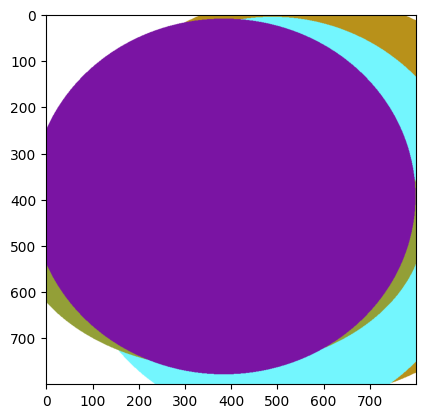

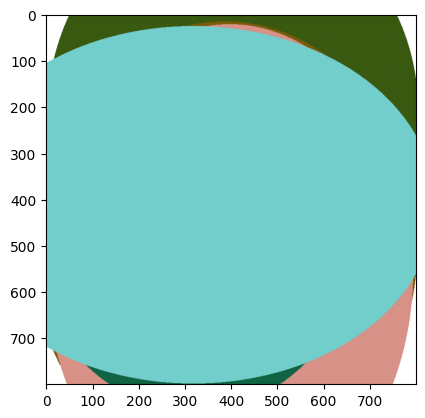

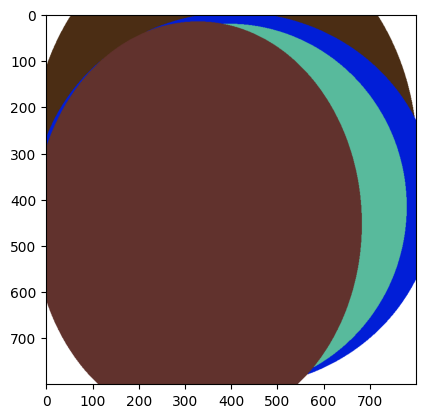

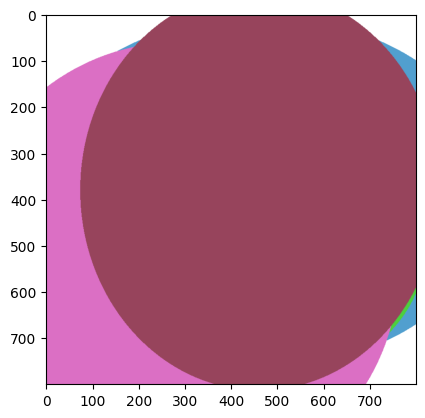

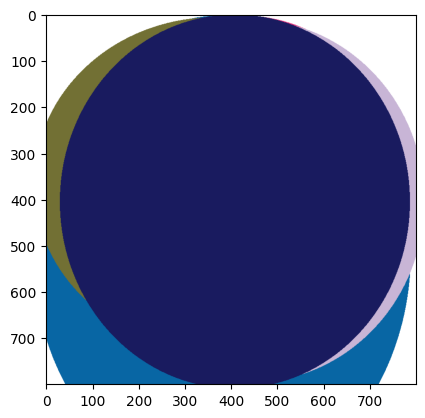

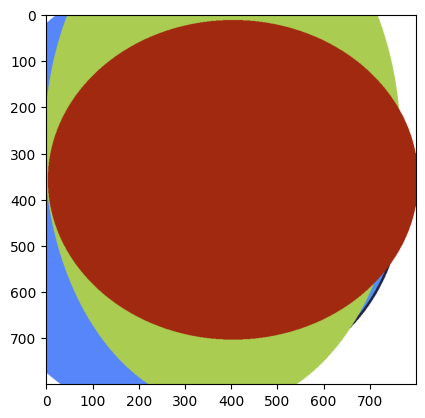

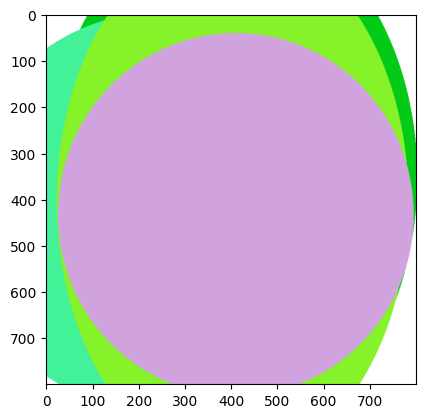

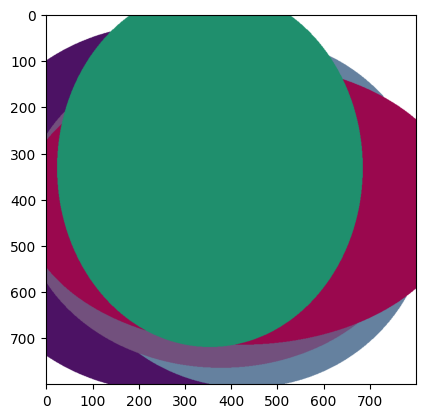

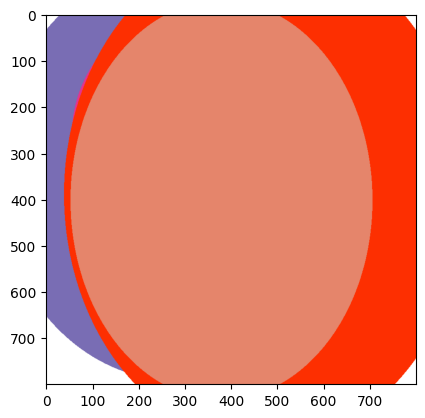

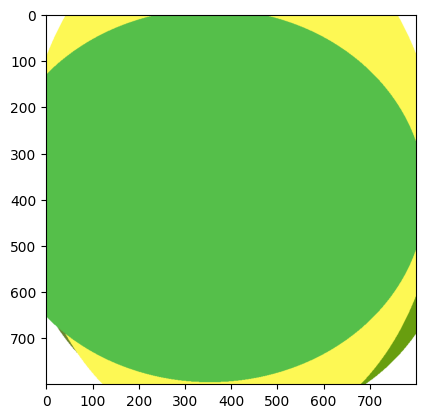

In [14]:
# Visualize Dataset Generated

for subdir, dirs, files in os.walk(save_dir):
    for filename in files:
        if filename.endswith(".png"):
            image_path = os.path.join(subdir, filename)
            image = plt.imread(image_path)
            plt.imshow(image)
            plt.show()


 

### Second Dataset After Update of Functions triangle, rectangle and ellipse to set up more separable objects


In [16]:
# Function to generate a rectangle
def generate_rectangle(image_size):
    bounds = torch.randint(50, 200, size=(2,))
    pt1 = random_point(bounds)
    pt2 = (pt1[0] + bounds[0], pt1[1] + bounds[1])
    color = random_color()
    return pt1, pt2, color

# Function to generate a triangle
def generate_triangle(image_size):
    bounds = torch.randint(50, 200, size=(2,))
    pt1 = random_point(bounds)
    pt2 = (pt1[0] + bounds[0], pt1[1] + bounds[1])
    pt3 = (pt1[0] + bounds[0] // 2, pt1[1])
    color = random_color()
    return pt1, pt2, pt3, color

# Function to generate an ellipse
def generate_ellipse(image_size):
    bounds = torch.randint(50, 200, size=(2,))
    center = random_point(bounds)
    axes = (bounds[0] // 2, bounds[1] // 2)
    angle = torch.randint(0, 360, size=(1,)).item()
    color = random_color()
    return center, axes, angle, color

# Directory to save the generated images
save_dir = "generated_shapes_images_dataset"
os.makedirs(save_dir, exist_ok=True)

# Generate and save images
for i in range(10):  # Generate 10 images
    # Create a black image with a white background
    image_size = (800, 800)
    image = Image.new("RGB", image_size, (255, 255, 255))

    # Generate rectangles
    for _ in range(5):
        pt1, pt2, color = generate_rectangle(image_size)
        draw = ImageDraw.Draw(image)
        draw.rectangle((pt1, pt2), fill=color)

    # Generate triangles
    for _ in range(5):
        pt1, pt2, pt3, color = generate_triangle(image_size)
        draw = ImageDraw.Draw(image)
        draw.polygon((pt1, pt2, pt3), fill=color)

    # Generate ellipses
    for _ in range(5):
        center, axes, angle, color = generate_ellipse(image_size)
        draw = ImageDraw.Draw(image)
        draw.ellipse(((center[0] - axes[0], center[1] - axes[1]), (center[0] + axes[0], center[1] + axes[1])),
                     fill=color, outline=color)

    # Save the generated image
    image_filename = os.path.join(save_dir, f"shape_{i+1}.png")
    image.save(image_filename)

print(f"Generated images saved to directory: {save_dir}")


Generated images saved to directory: generated_shapes_images_dataset


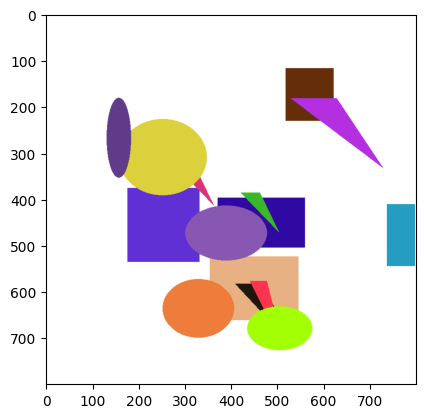

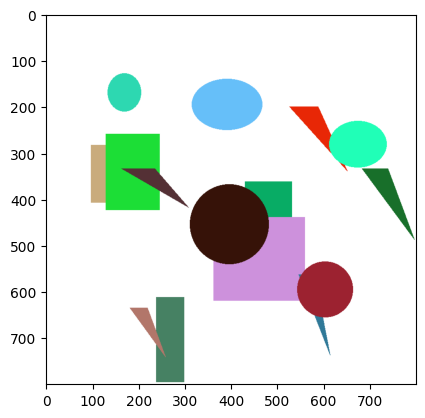

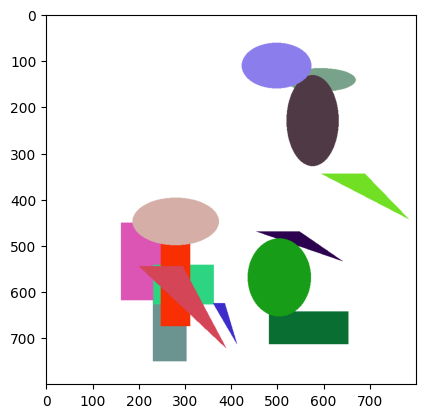

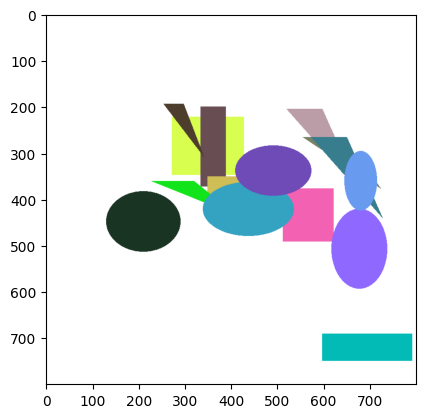

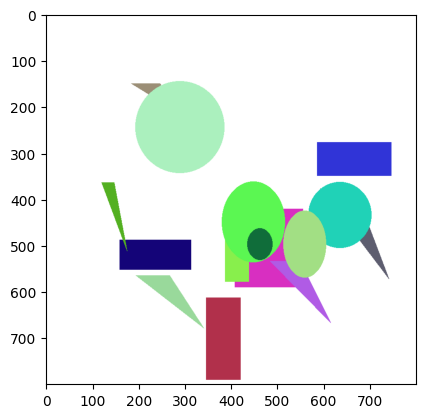

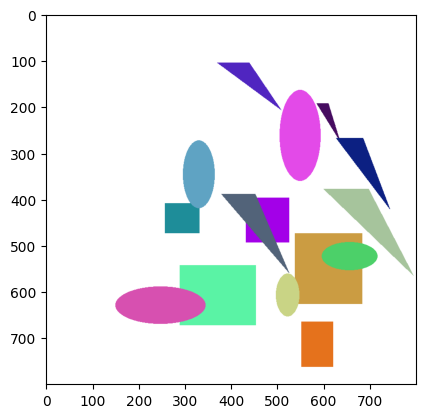

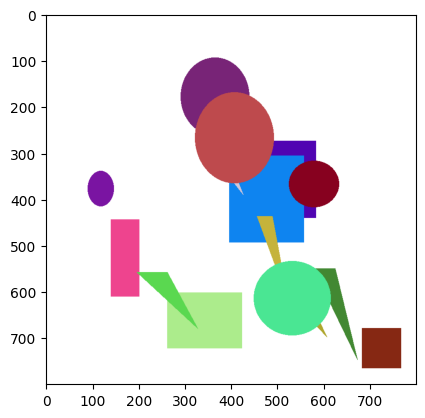

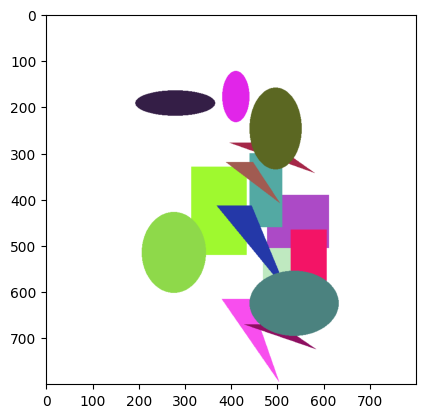

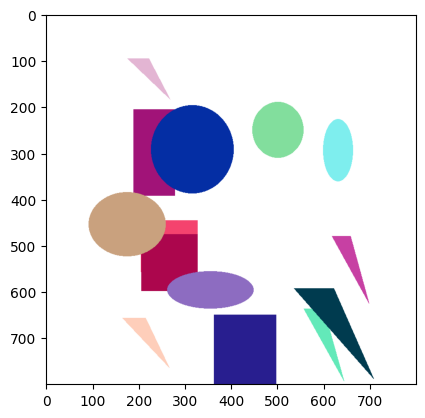

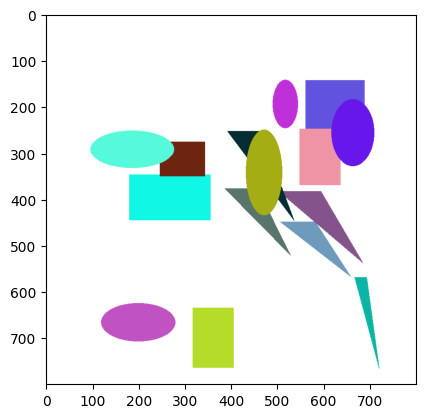

In [17]:
# Visualize Dataset Generated

for subdir, dirs, files in os.walk(save_dir):
    for filename in files:
        if filename.endswith(".png"):
            image_path = os.path.join(subdir, filename)
            image = plt.imread(image_path)
            plt.imshow(image)
            plt.show()


 